<a href="https://colab.research.google.com/github/Itiel-z/BIA-Projects/blob/main/Project_1/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Itiel

Github link - https://github.com/Itiel-z/BIA-Projects/blob/main/Project_1/Project_1.ipynb

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
# Data collection
try:
  if not os.path.exists("historical_stocks.csv") or not os.path.exists("historical_stock_prices.csv"):
    raise FileNotFoundError("CSV files not found in current directory.")
  else:
    stocks = pd.read_csv("historical_stocks.csv", encoding='utf-8')
    stock_prices = pd.read_csv("historical_stock_prices.csv", encoding='utf-8')
  if stocks.empty or stock_prices.empty:
    raise ValueError("One or both of the files loaded are empty.")
  print("Successfully loaded both datasets!")
except Exception as e:
  print(f"Error loading data: {str(e)}")
  raise

Successfully loaded both datasets!


In [3]:
# Display the first few files of the stocks dataframe
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
# display the first few files of stock_prices dataframe
stock_prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900.0,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800.0,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100.0,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400.0,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100.0,2013-05-14


In [5]:
# Basic information about the stock_price df
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335796 entries, 0 to 335795
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ticker     335796 non-null  object 
 1   open       335795 non-null  float64
 2   close      335795 non-null  float64
 3   adj_close  335795 non-null  float64
 4   low        335795 non-null  float64
 5   high       335795 non-null  float64
 6   volume     335795 non-null  float64
 7   date       335795 non-null  object 
dtypes: float64(6), object(2)
memory usage: 20.5+ MB


In [6]:
# Check for missing values in the stock_prices df
stock_prices.isnull().sum()

,0
ticker,0
open,1
close,1
adj_close,1
low,1
high,1
volume,1
date,1


In [7]:
# Forward fill the missing values
stock_prices.ffill( inplace=True)

In [8]:
# Basic information about the stocks df
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB


In [9]:
# Check for duplicates in the stock_prices df
stock_prices.duplicated().sum()

np.int64(0)

In [10]:
# Check for duplicates in the stocks df
stocks.duplicated().sum()

np.int64(0)

In [11]:
# Handle missing 'sector' values using the mode
sector_mapping = (stocks.dropna(subset=['sector'])
    .groupby('ticker')['sector']
    .agg(lambda x: x.mode().iloc[0]))
stocks['sector'] = stocks['sector'].fillna(stocks['ticker'].map(sector_mapping))

# Handle missing 'industry' values using the mode
industry_mapping = (stocks.dropna(subset=['industry'])
    .groupby('ticker')['industry']
    .agg(lambda x: x.mode().iloc[0]))
stocks['industry'] = stocks['industry'].fillna(stocks['ticker'].map(industry_mapping))

# Drop rows where sector or industry is still missing after mapping
stocks = stocks.dropna(subset=['sector', 'industry'])

In [12]:
# Verifying that there are no missing values anymore
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    5020 non-null   object
 1   exchange  5020 non-null   object
 2   name      5020 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 235.3+ KB


In [13]:
# Convert datetime and set as index
stock_prices['date'] = pd.to_datetime(stock_prices['date'], format='%Y-%m-%d')
stock_prices = stock_prices.sort_values(by='date')
stock_prices.set_index('date', inplace=True)

In [14]:
print(stock_prices.isna().sum())

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
dtype: int64


In [15]:
# Create decade column
stock_prices['decade'] = stock_prices.index.year // 10 * 10

# Get the list of the decades
decades = sorted(stock_prices['decade'].unique())

# create a dictionary to store decades df and create keys
decades_df = {}
for decade in decades:
    decades_df[decade] = stock_prices[stock_prices['decade'] == decade]

In [16]:
# Merge the stock_prices df to include sector
merged = stock_prices.merge(stocks[['ticker', 'sector']], on='ticker', how='left')

In [17]:
merged.head()

,ticker,open,close,adj_close,low,high,volume,decade,sector
0,PFE,0.846354,0.859375,0.000628,0.846354,0.859375,2332800.0,1970,HEALTH CARE
1,PFE,0.859375,0.848958,0.000620,0.846354,0.861979,1531200.0,1970,HEALTH CARE
2,PFE,0.848958,0.846354,0.000618,0.841146,0.851562,2452800.0,1970,HEALTH CARE
3,PFE,0.846354,0.864583,0.000631,0.843750,0.869792,2227200.0,1970,HEALTH CARE
4,PFE,0.864583,0.864583,0.000631,0.851562,0.864583,979200.0,1970,HEALTH CARE


In [18]:
# Analysis by decade
def calculate_decade_stats(decade_df, decade):
  print(f"Summary statistics for {decade}s:")
  stats = decade_df[price_columns + ['volume']].describe().transpose()
  stats['median'] = decade_df[price_columns + ['volume']].median()
  stats['IQR'] = stats['75%'] - stats['25%']
  # Select specific columns for printing
  print(stats[['mean', 'std', 'min', 'max', 'median', '25%', '50%', '75%', 'IQR', 'count']])
  return stats

In [19]:
price_columns = ['open', 'close', 'adj_close', 'low', 'high']
decade_stats = {}
for decade, decade_df in decades_df.items():
  decade_stats[decade] = calculate_decade_stats(decade_df, decade)

Summary statistics for 1970s:
                   mean           std         min           max        median  \
open       6.755195e-01  2.303392e-01    0.158958  1.656120e+00  6.510417e-01   
close      6.746532e-01  2.301390e-01    0.130906  1.656120e+00  6.510417e-01   
adj_close  2.794681e-02  6.561326e-02    0.000343  3.418288e-01  5.922235e-04   
low        6.681443e-01  2.292959e-01    0.130906  1.656120e+00  6.406250e-01   
high       6.944693e-01  2.404194e-01    0.177659  1.786012e+00  6.588542e-01   
volume     2.177341e+06  2.072483e+06  100.000000  2.414880e+07  1.833600e+06   

                     25%           50%           75%           IQR   count  
open            0.559896  6.510417e-01  7.952559e-01  2.353601e-01  2445.0  
close           0.559896  6.510417e-01  7.952559e-01  2.353601e-01  2445.0  
adj_close       0.000479  5.922235e-04  7.155734e-04  2.363147e-04  2445.0  
low             0.549479  6.406250e-01  7.890625e-01  2.395833e-01  2445.0  
high            0

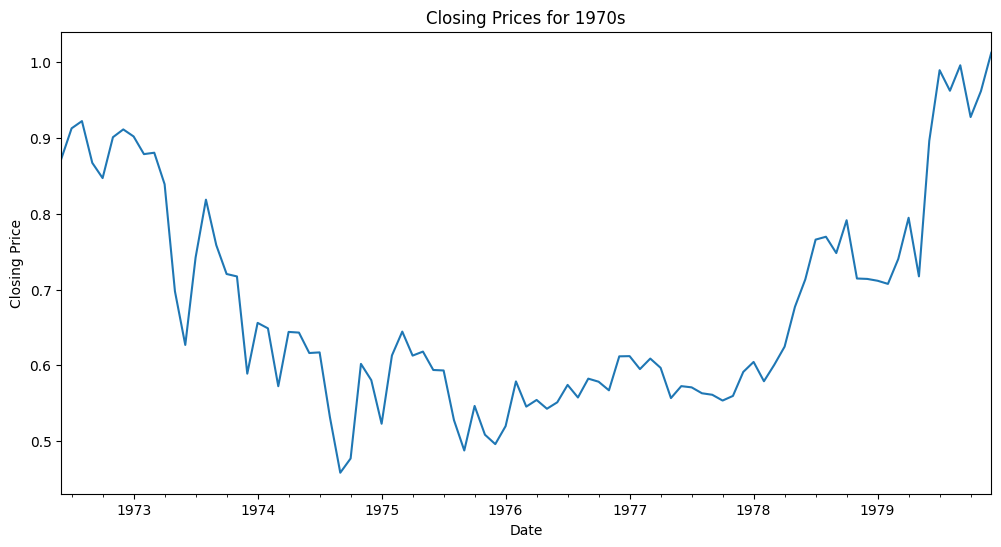

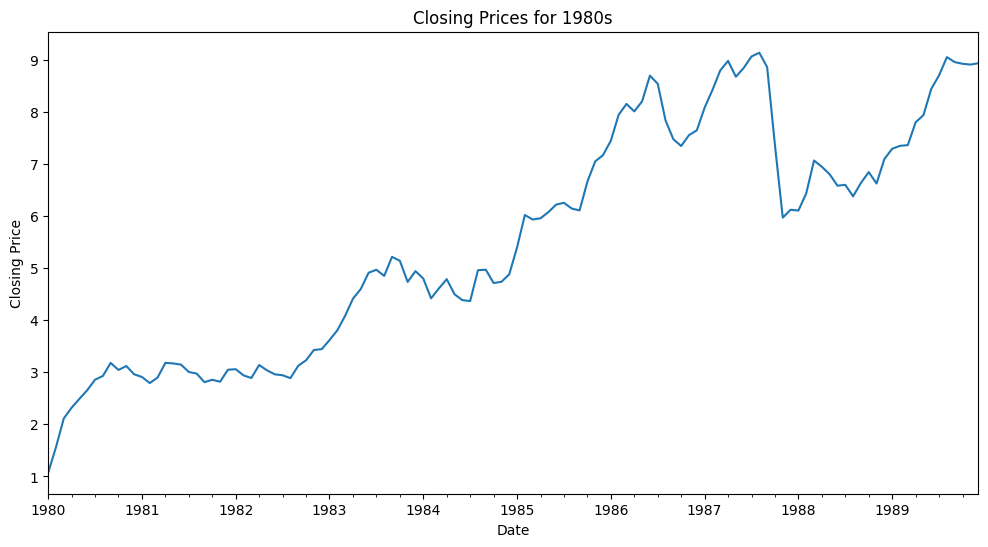

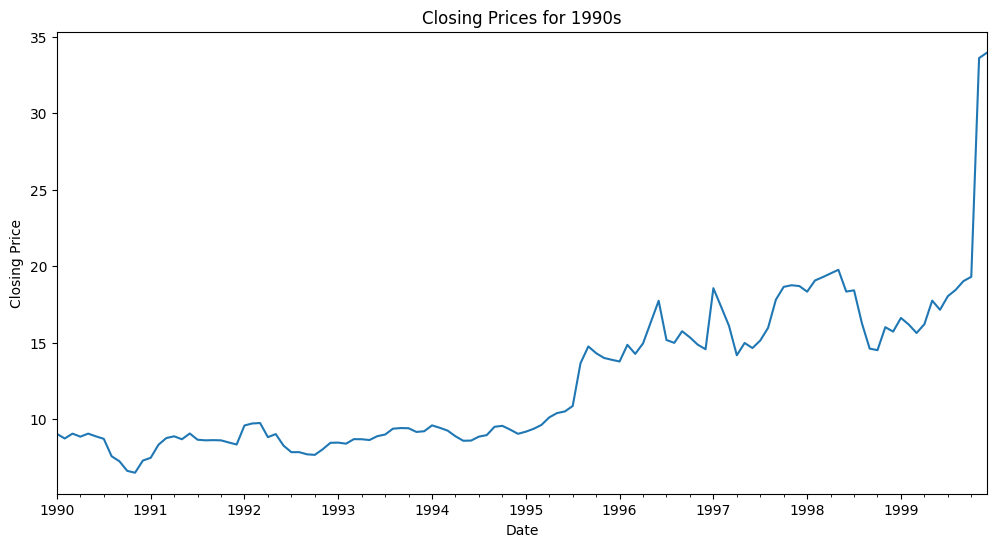

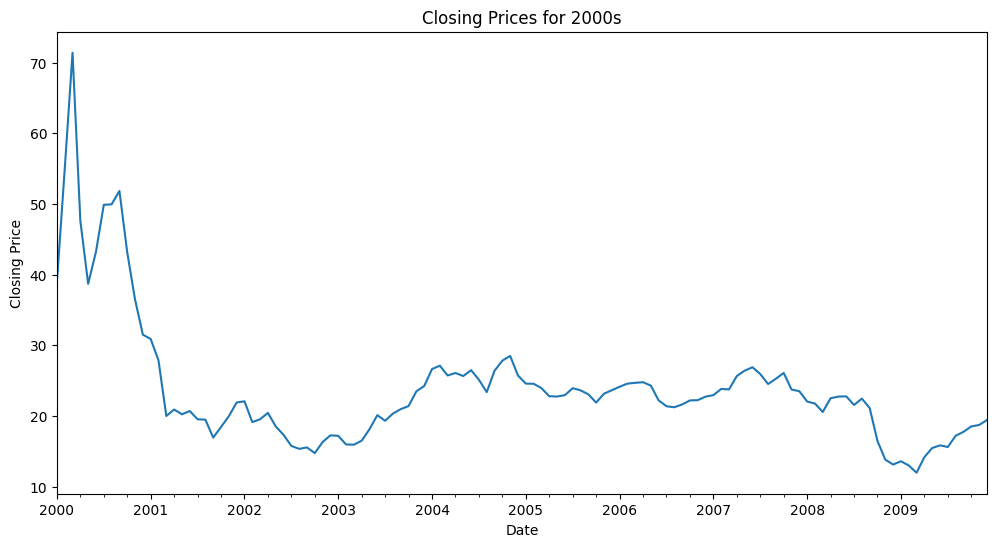

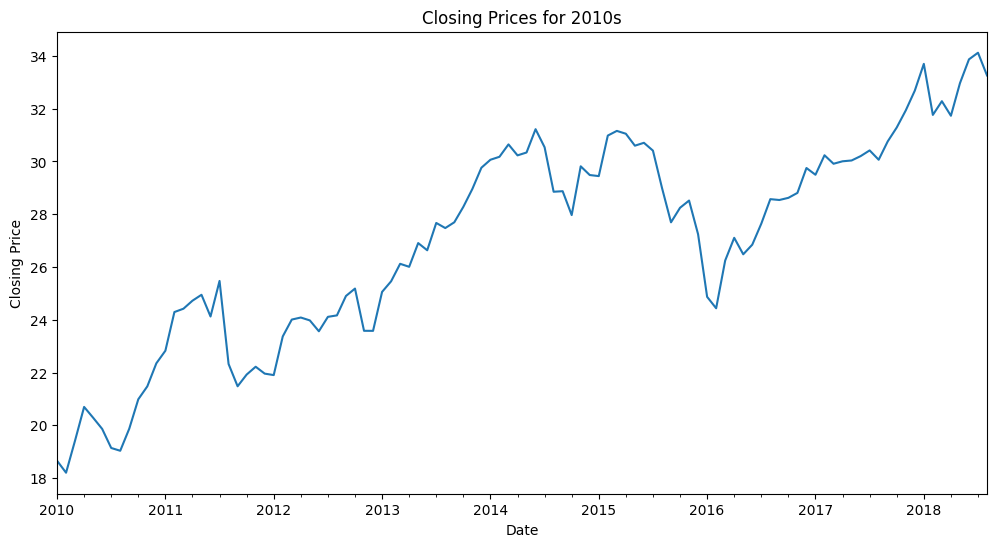

In [20]:
# Visualizations
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 6))
  decade_df.resample('ME')['close'].mean().plot(title=f'Closing Prices for {decade}s')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.show()

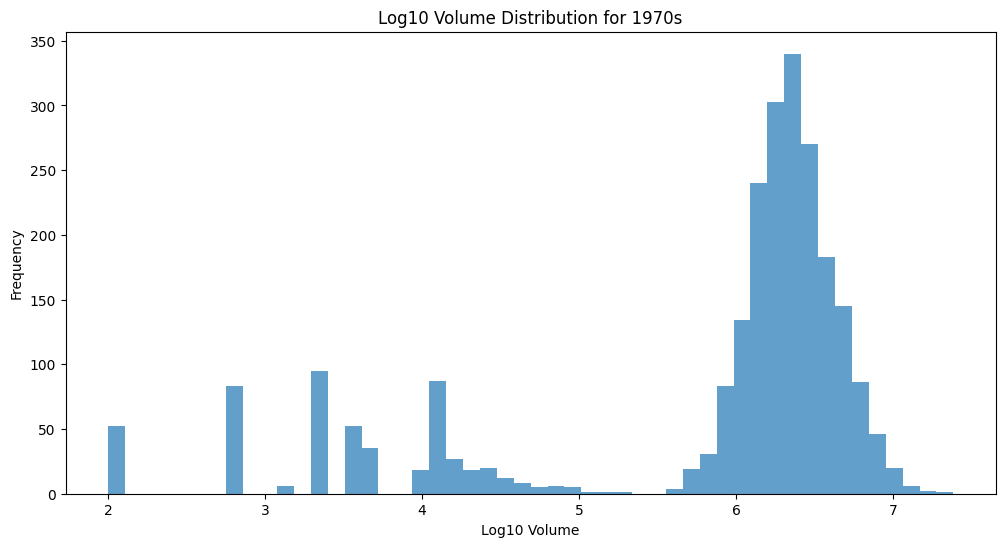

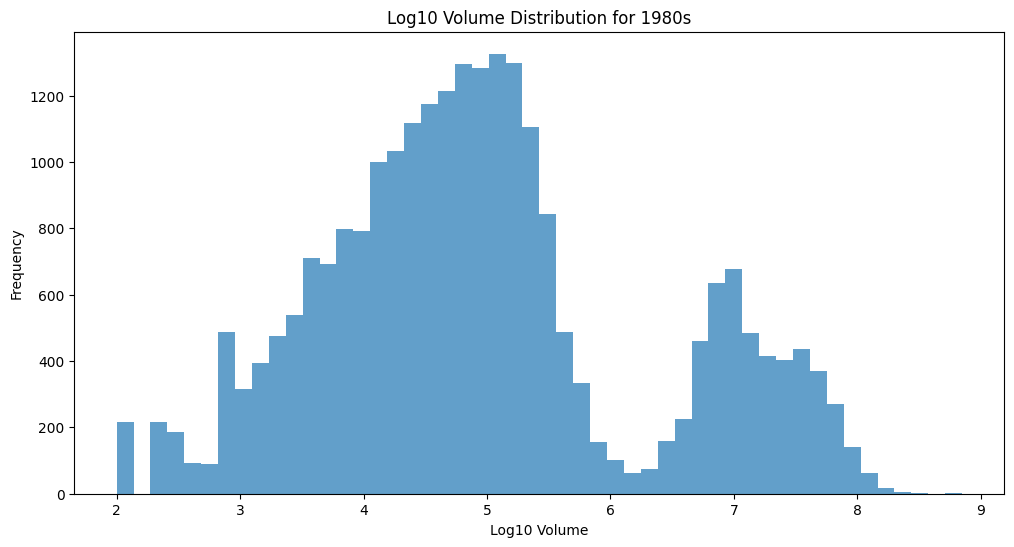

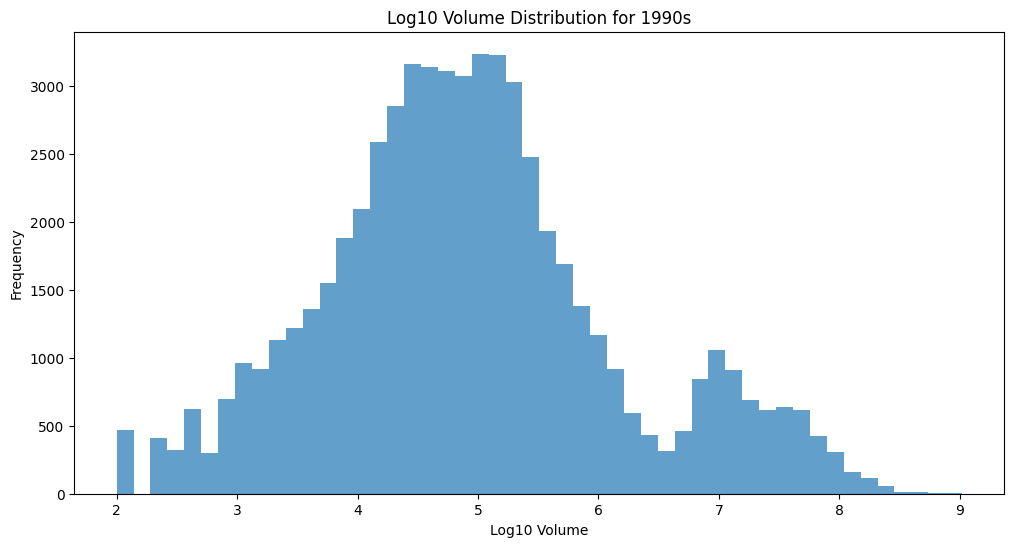

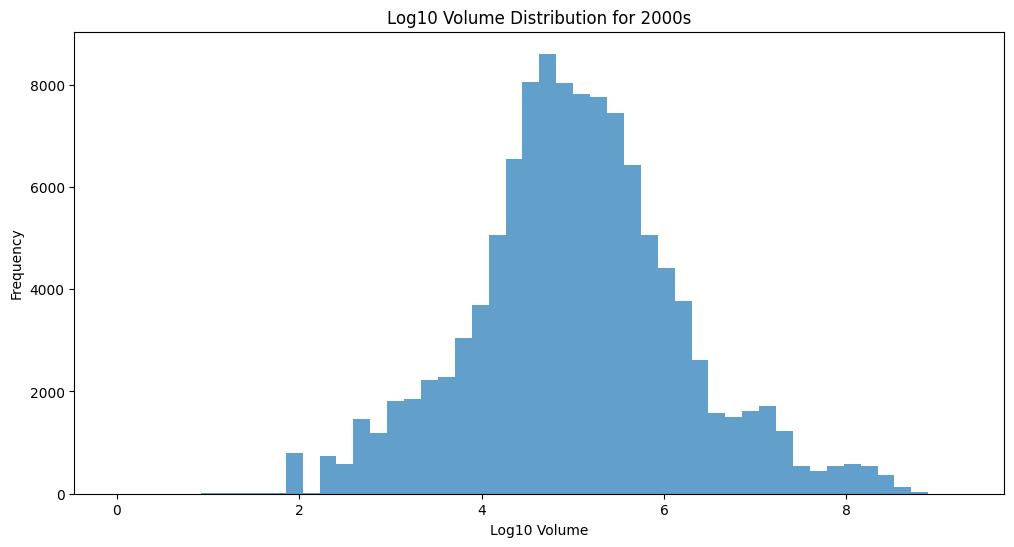

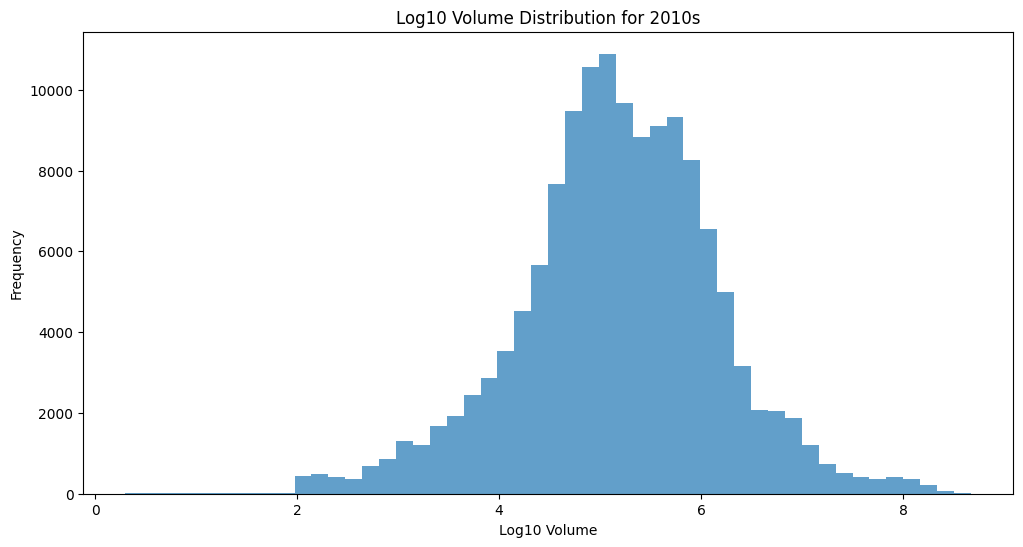

In [21]:
# Histogram of volume
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 6))
  plt.hist(np.log10(decade_df['volume']).dropna(), bins=50, alpha=0.7)
  plt.title(f'Log10 Volume Distribution for {decade}s')
  plt.xlabel('Log10 Volume')
  plt.ylabel('Frequency')
  plt.show()

<Figure size 1200x800 with 0 Axes>

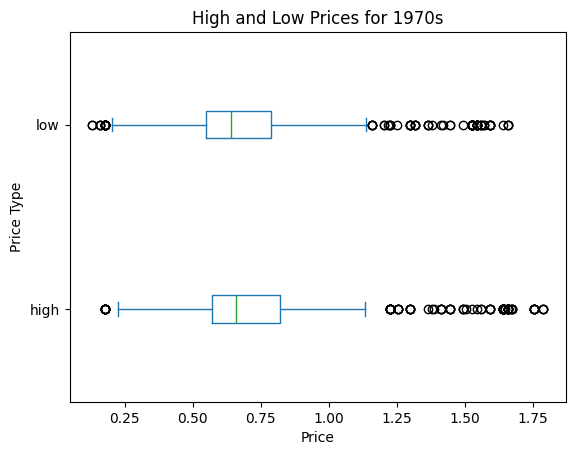

<Figure size 1200x800 with 0 Axes>

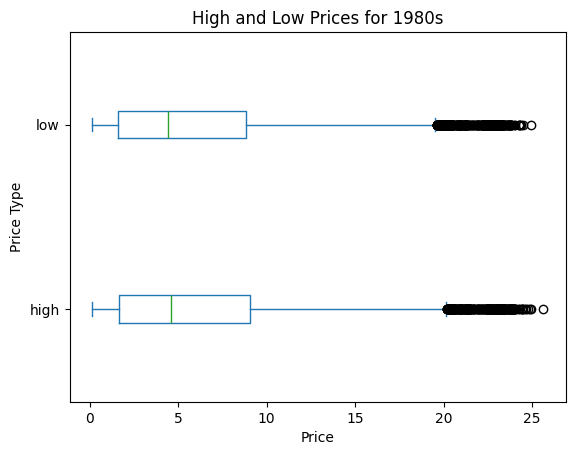

<Figure size 1200x800 with 0 Axes>

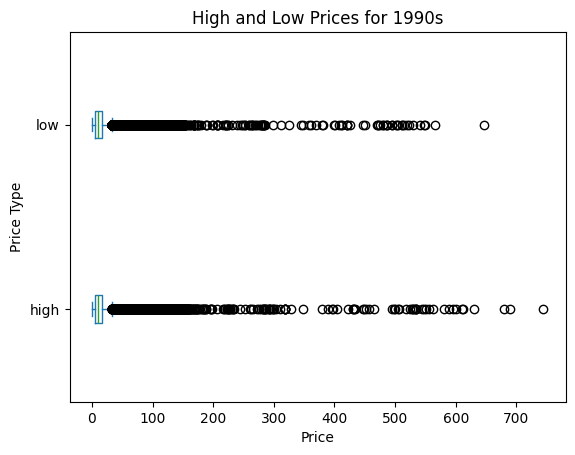

<Figure size 1200x800 with 0 Axes>

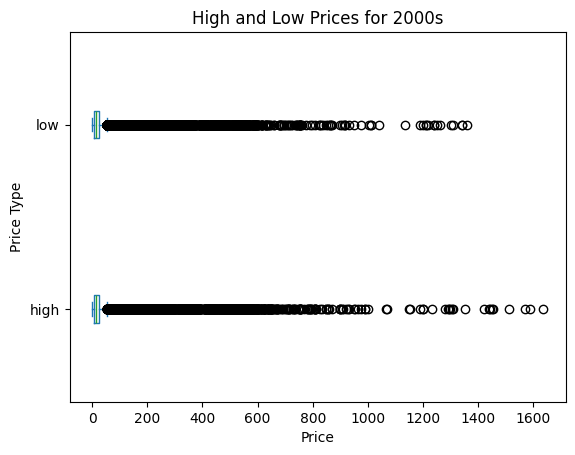

<Figure size 1200x800 with 0 Axes>

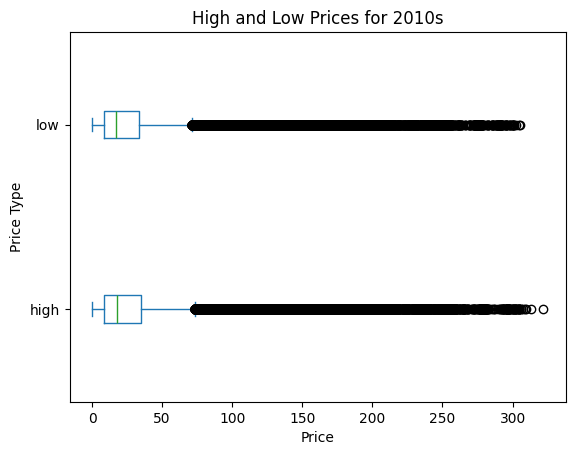

In [22]:
# boxplot for high and low prices
for decade, decade_df in decades_df.items():
  plt.figure(figsize=(12, 8))
  decade_df[['high', 'low']].plot(kind='box', vert=False)
  plt.title(f'High and Low Prices for {decade}s')
  plt.ylabel('Price Type')
  plt.xlabel('Price')
  plt.show()

In [23]:
# Comparative Analysis
# Compare decades
comparison_stats = pd.concat(decade_stats, axis=1)
print("\nComparative Statistics Across Decades:")
print(comparison_stats.loc[:, (slice(None), 'mean')].droplevel(1, axis=1))



Comparative Statistics Across Decades:
                   1970          1980          1990          2000  \
open       6.755195e-01  5.887408e+00  1.372588e+01  2.347843e+01   
close      6.746532e-01  5.889049e+00  1.372574e+01  2.346142e+01   
adj_close  2.794681e-02  1.791166e+00  8.787126e+00  1.938286e+01   
low        6.681443e-01  5.828191e+00  1.345293e+01  2.290556e+01   
high       6.944693e-01  5.973522e+00  1.399435e+01  2.400566e+01   
volume     2.177341e+06  4.804977e+06  4.227276e+06  4.667197e+06   

                   2010  
open       2.733706e+01  
close      2.733743e+01  
adj_close  2.537891e+01  
low        2.699011e+01  
high       2.766671e+01  
volume     2.146875e+06  


In [24]:

# Compare price volatility (std/mean)
volatility = {}
for decade in decades:
    decade_vol = comparison_stats.loc['close', (decade, 'std')] / comparison_stats.loc['close', (decade, 'mean')]
    volatility[decade] = decade_vol

print("\nVolatility (std/mean) by Decade:")
for decade, vol in sorted(volatility.items()):
    print(f"{decade}s: {vol:.4f}")



Volatility (std/mean) by Decade:
1970s: 0.3411
1980s: 0.8812
1990s: 1.5683
2000s: 1.9928
2010s: 1.1545


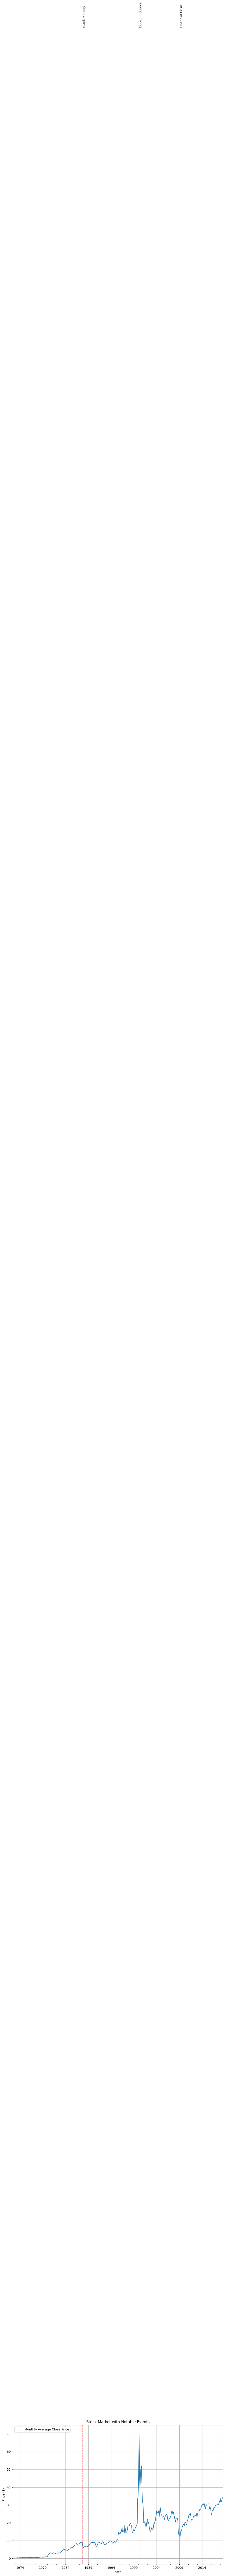

In [30]:
# Notable Events Analysis
# Mark significant market events
events = {
    'Black Monday': '1987-10-19',
    'Dot-com Bubble': '2000-03-10',
    'Financial Crisis': '2009-03-16'
}

plt.figure(figsize=(12, 8))
stock_prices.resample('ME')['close'].mean().plot(label='Monthly Average Close Price')

for event, date in events.items():
    event_date = pd.to_datetime(date)
    if event_date in stock_prices.index:
        plt.axvline(event_date, color='red', linestyle='--', alpha=0.5)
        plt.text(event_date, stock_prices['close'].max() * 0.9, event, rotation=90)

plt.title('Stock Market with Notable Events')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# Summary report

Summary of EDA Findings:

1. **Price Trends**: Average monthly closing prices generally increased over time, particularly in the 1990s and 2010s.
2. **Volume Trends**: Trading volume increased significantly in later decades, especially in the 2000s and 2010s, indicating greater market activity.
3. **Volatility**: Boxplots show that price volatility also increased in recent decades, with a wider spread between high and low prices.
4. **Sector Influence**: The merged dataset allows for future sector-based analysis.

Initial Hypotheses:
- Market deregulation and the rise of tech stocks may explain sharp increases post-1990s.
- Economic events (e.g., dot-com bubble, 2008 crash) correlate with volume and price volatility spikes.
- Increasing algorithmic trading may have influenced volume spikes in recent years.

Next Steps:
- Apply statistical tests to validate observed trends.
- Perform sector-based comparisons.
